In [1]:
#Importing libraries


import pandas as pd
import numpy
import random
random.seed(4)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("/kaggle/input/housing-prices-dataset/Housing.csv")

In [3]:
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
#Data information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
# missing values check

df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

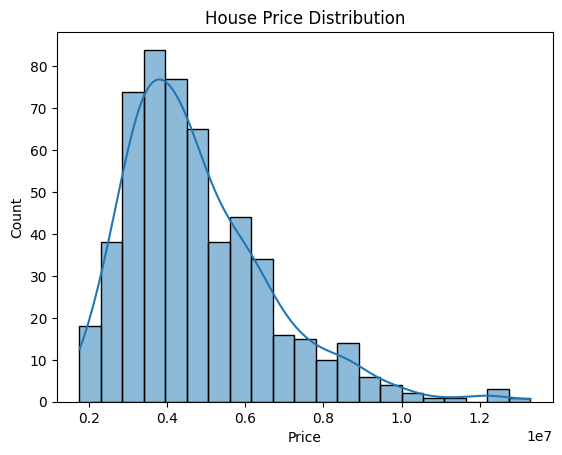

In [7]:
plt.figure
sns.histplot(df['price'], kde=True)
plt.title('House Price Distribution')
plt.xlabel('Price')
plt.show()

<Axes: xlabel='airconditioning', ylabel='bedrooms'>

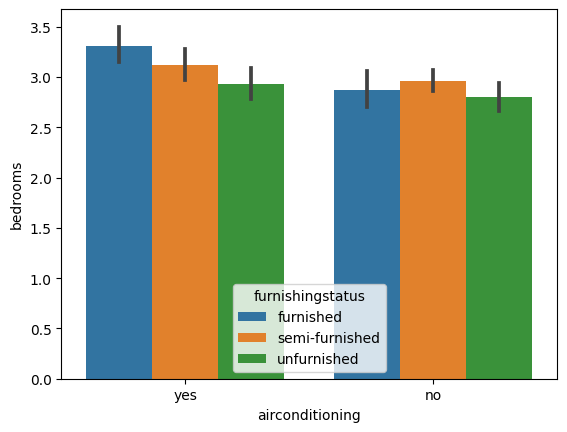

In [8]:
sns.barplot(x=df['airconditioning'],y=df['bedrooms'],hue=df["furnishingstatus"])

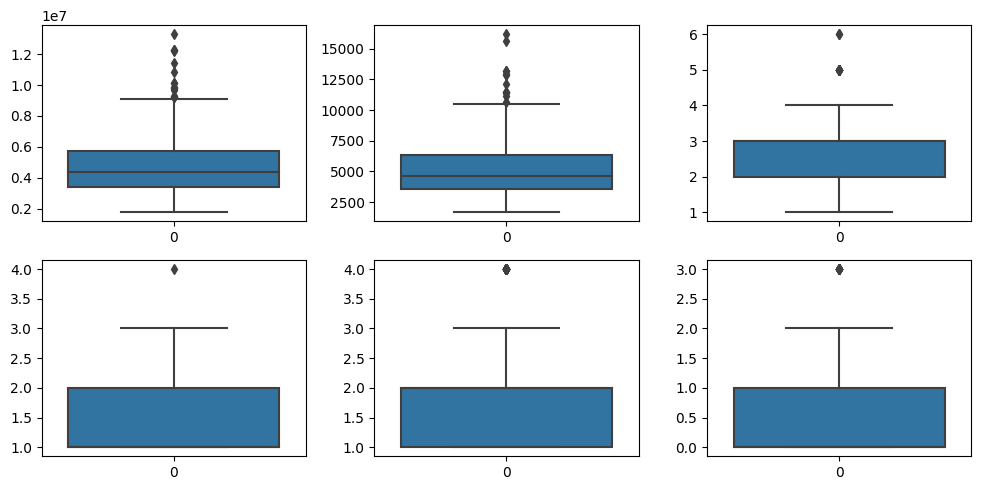

In [9]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])

plt.tight_layout()

<Axes: xlabel='furnishingstatus', ylabel='price'>

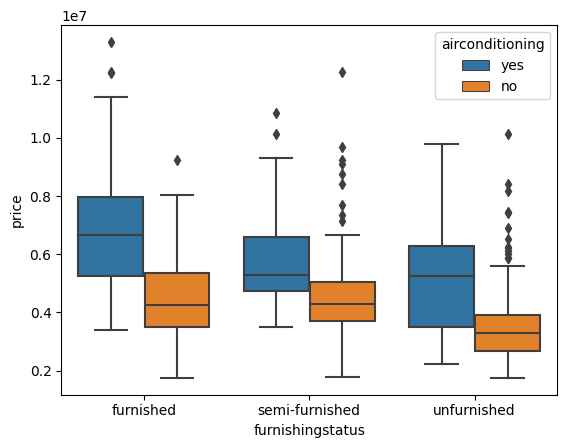

In [10]:
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = df)

<Axes: xlabel='area', ylabel='price'>

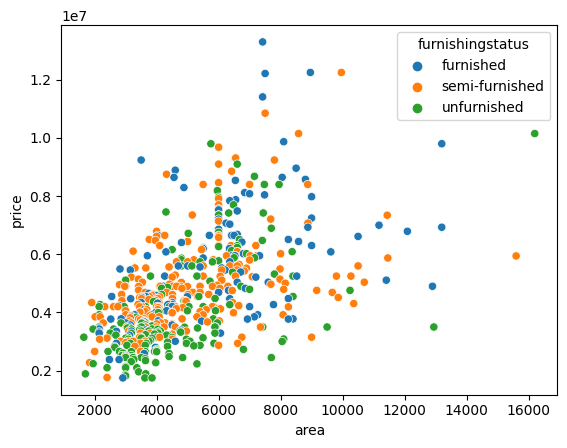

In [11]:
sns.scatterplot(y=df['price'],x=df['area'],hue=df['furnishingstatus'])

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


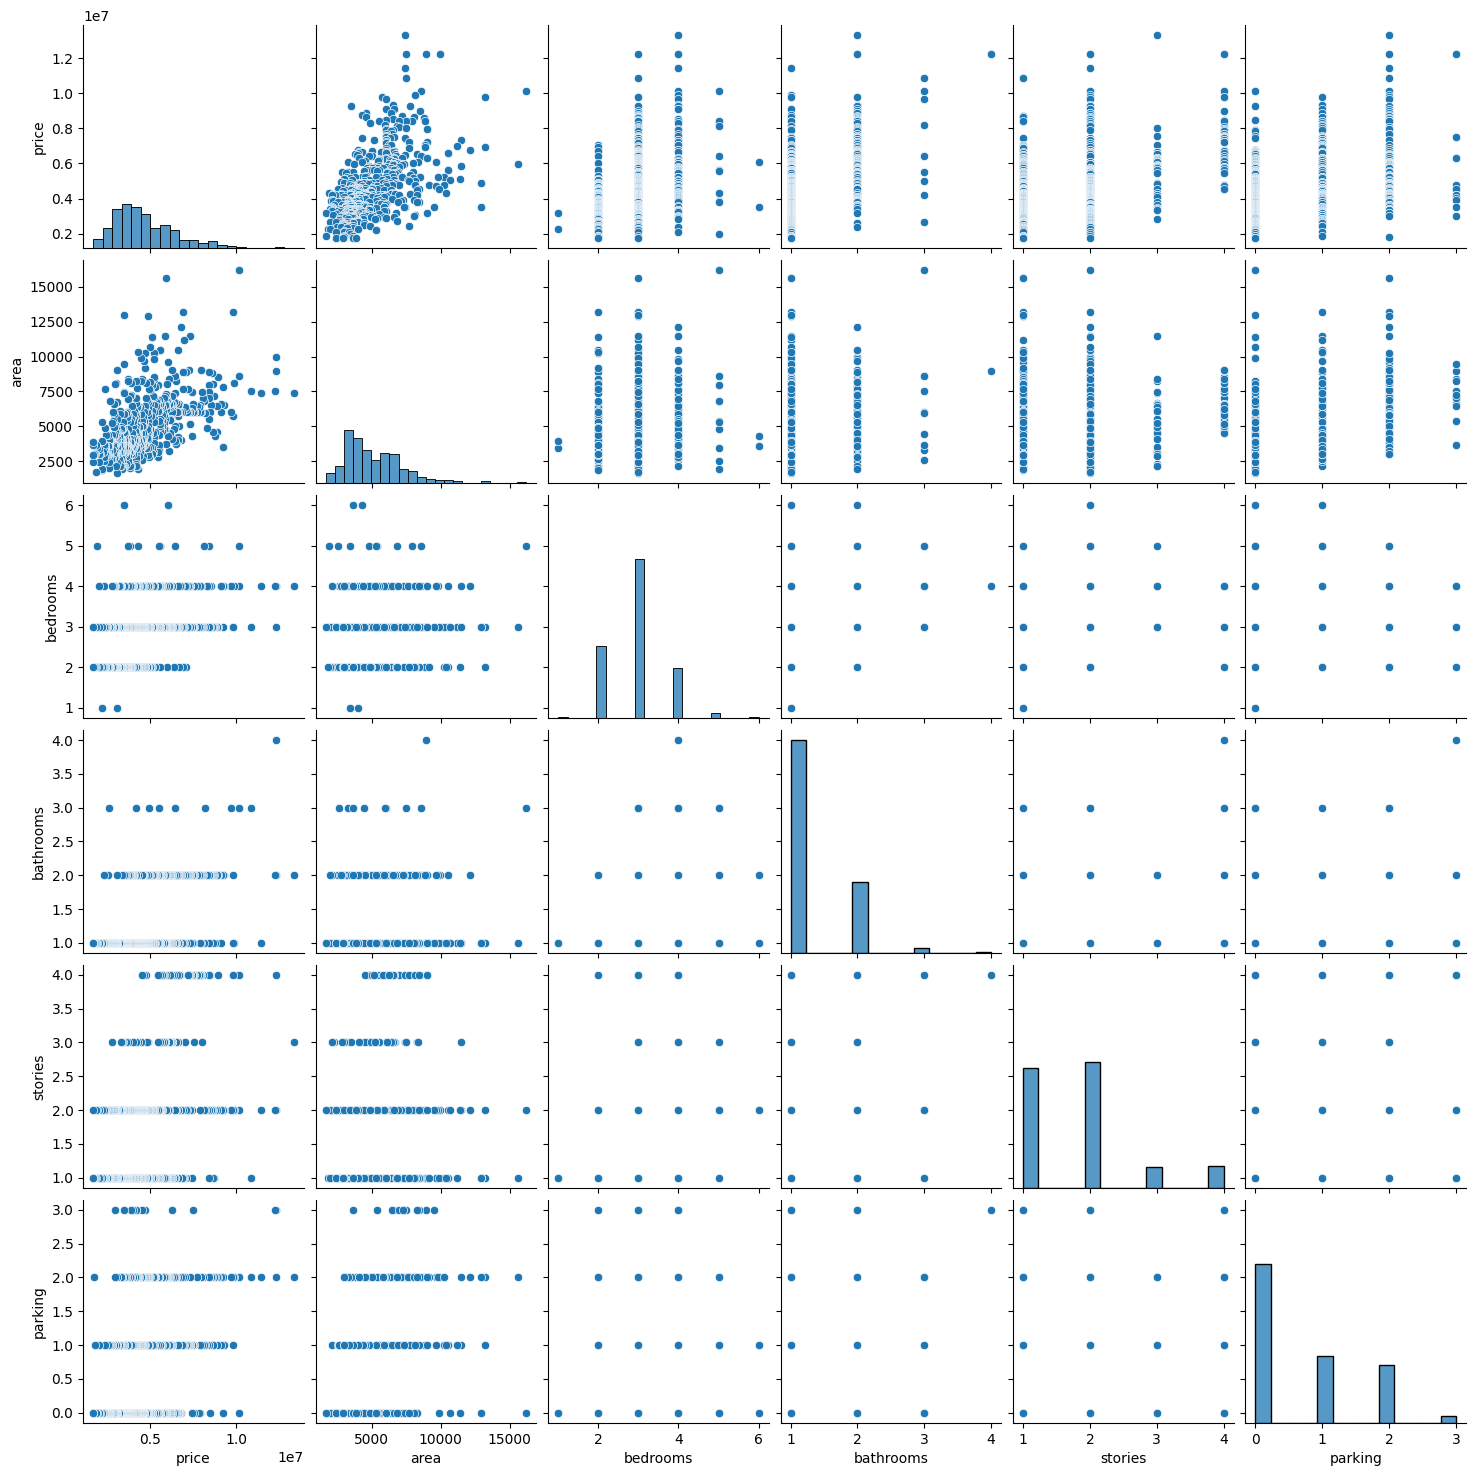

In [12]:
sns.pairplot(df)
plt.show()

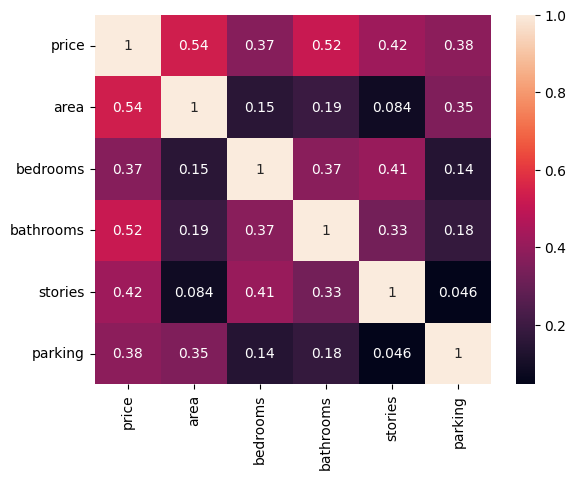

In [13]:
sns.heatmap(df.corr(numeric_only=True), annot = True)
plt.show()

# Modeling:

In [14]:
X = df.drop(['price'],axis=1)
y = df['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [15]:
numeric_preprocessor = Pipeline(
    steps=[
        ("imputation_mean", SimpleImputer(missing_values=numpy.nan, strategy="mean")),
        ("scaler", StandardScaler()),
    ]
)

categorical_preprocessor = Pipeline(
    steps=[
        (
            "imputation_most_frequent",
            SimpleImputer(fill_value="missing", strategy="most_frequent"),
        ),
        ("onehot", OneHotEncoder(handle_unknown="ignore", drop='first')),
    ]
)

categorical_col = ['mainroad', 'guestroom', 'basement', 'prefarea', 'furnishingstatus']
numerical_col = ['price', 'bedrooms', 'bathrooms', 'bedrooms', 'stories']
preprocessor = ColumnTransformer(
    [
        ("categorical", categorical_preprocessor, categorical_col),
        ("numerical", numeric_preprocessor, numerical_col),
    ]
)

preprocessor
 

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('imputation_most_frequent',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['mainroad', 'guestroom', 'basement',
                                  'prefarea', 'furnishingstatus']),
                                ('numerical',
                                 Pipeline(steps=[('imputation_mean',
                                                  SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['price', 'bedrooms', 'bathrooms', 'bedrooms',
                                  'stories'])])

In [16]:
X_train.head(), y_train.head()

(     area  bedrooms  bathrooms  stories mainroad guestroom basement  \
 126  7160         3          1        1      yes        no      yes   
 363  3584         2          1        1      yes        no       no   
 370  4280         2          1        1      yes        no       no   
 31   7000         3          1        4      yes        no       no   
 113  9620         3          1        1      yes        no      yes   
 
     hotwaterheating airconditioning  parking prefarea furnishingstatus  
 126              no              no        2      yes      unfurnished  
 363             yes              no        0       no   semi-furnished  
 370              no             yes        2       no   semi-furnished  
 31               no             yes        2       no   semi-furnished  
 113              no              no        2      yes        furnished  ,
 126    5880000
 363    3710000
 370    3640000
 31     8400000
 113    6083000
 Name: price, dtype: int64)